# Chapter 1: SQL Basics

This chapter covers the fundamental concepts of SQL using SQLite. You'll learn database setup, table creation, and basic querying.

## Topics Covered:
1. Database Setup and Connection
2. Creating Tables and Data Types
3. Inserting Data
4. Basic SELECT Queries
5. Filtering with WHERE
6. Sorting Data with ORDER BY

```{raw} html
<a href="https://colab.research.google.com/github/yourusername/quarto_binder_thebe_demo/blob/main/notebooks/01-transformer-demo.ipynb" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>
```

## pdf


<div style="width: 100%; height: 600px; border: 1px solid #ccc; border-radius: 4px; overflow: hidden;">
    <iframe 
        src="../assets/pdfs/Python_Complete_Notes.pdf" 
        width="100%" 
        height="100%" 
        style="border: none;"
        title="Python Complete Notes PDF"
        type="application/pdf">
        <p>Your browser does not support PDFs. Please download the PDF to view it: 
        <a href="../assets/pdfs/Python_Complete_Notes.pdf">Download PDF</a></p>
    </iframe>
</div>

## 1. Database Setup and Connection

First, let's import the necessary libraries and connect to our SQLite database.

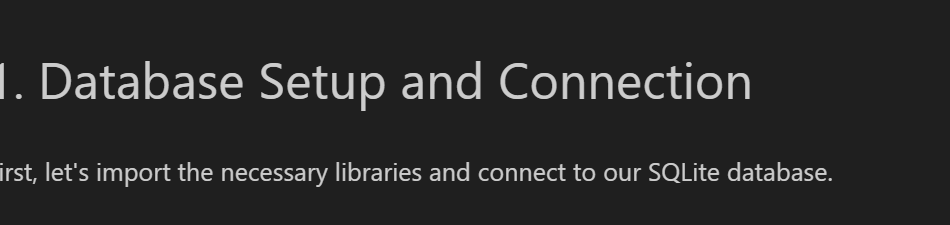

In [36]:
import sqlite3
import pandas as pd
from IPython.display import display

# Connect to the SQLite database
conn = sqlite3.connect('my_database.db')
cursor = conn.cursor()

print("Connected to SQLite database successfully!")

Connected to SQLite database successfully!


## 2. Creating Tables

Let's create some sample tables to work with. We'll create tables for a simple company database with employees, departments, and projects.

In [37]:
# Create departments table
cursor.execute('''
CREATE TABLE IF NOT EXISTS departments (
    dept_id INTEGER PRIMARY KEY,
    dept_name VARCHAR(100) NOT NULL,
    location VARCHAR(100)
)
''')

# Create employees table
cursor.execute('''
CREATE TABLE IF NOT EXISTS employees (
    emp_id INTEGER PRIMARY KEY,
    first_name VARCHAR(50) NOT NULL,
    last_name VARCHAR(50) NOT NULL,
    email VARCHAR(100) UNIQUE,
    hire_date DATE,
    salary DECIMAL(10, 2),
    dept_id INTEGER,
    FOREIGN KEY (dept_id) REFERENCES departments (dept_id)
)
''')

# Create projects table
cursor.execute('''
CREATE TABLE IF NOT EXISTS projects (
    project_id INTEGER PRIMARY KEY,
    project_name VARCHAR(100) NOT NULL,
    start_date DATE,
    end_date DATE,
    budget DECIMAL(12, 2),
    dept_id INTEGER,
    FOREIGN KEY (dept_id) REFERENCES departments (dept_id)
)
''')

conn.commit()
print("Tables created successfully!")

Tables created successfully!


## 3. Inserting Sample Data

Now let's populate our tables with some sample data to work with.

In [38]:
# Insert departments
departments_data = [
    (1, 'Human Resources', 'New York'),
    (2, 'Engineering', 'San Francisco'),
    (3, 'Marketing', 'Chicago'),
    (4, 'Sales', 'Los Angeles'),
    (5, 'Finance', 'Boston')
]

cursor.executemany('INSERT OR REPLACE INTO departments VALUES (?, ?, ?)', departments_data)

# Insert employees
employees_data = [
    (1, 'John', 'Doe', 'john.doe@company.com', '2020-01-15', 75000, 2),
    (2, 'Jane', 'Smith', 'jane.smith@company.com', '2019-03-22', 82000, 2),
    (3, 'Mike', 'Johnson', 'mike.johnson@company.com', '2021-06-10', 65000, 3),
    (4, 'Sarah', 'Williams', 'sarah.williams@company.com', '2020-09-05', 90000, 1),
    (5, 'David', 'Brown', 'david.brown@company.com', '2018-11-12', 95000, 4),
    (6, 'Emily', 'Davis', 'emily.davis@company.com', '2022-02-28', 70000, 5),
    (7, 'Robert', 'Wilson', 'robert.wilson@company.com', '2019-08-17', 88000, 2),
    (8, 'Lisa', 'Anderson', 'lisa.anderson@company.com', '2021-04-03', 72000, 3)
]

cursor.executemany('INSERT OR REPLACE INTO employees VALUES (?, ?, ?, ?, ?, ?, ?)', employees_data)

# Insert projects
projects_data = [
    (1, 'Website Redesign', '2023-01-01', '2023-06-30', 150000, 2),
    (2, 'Mobile App Development', '2023-03-15', '2023-12-31', 300000, 2),
    (3, 'Marketing Campaign Q2', '2023-04-01', '2023-06-30', 75000, 3),
    (4, 'Sales Training Program', '2023-02-01', '2023-05-31', 50000, 4),
    (5, 'Financial System Upgrade', '2023-01-15', '2023-08-31', 200000, 5)
]

cursor.executemany('INSERT OR REPLACE INTO projects VALUES (?, ?, ?, ?, ?, ?)', projects_data)

conn.commit()
print("Sample data inserted successfully!")

Sample data inserted successfully!


## 4. Basic SELECT Queries

Let's start with simple SELECT statements to retrieve data from our tables.

In [39]:
# Example 1: Select all columns from employees table
print("All employees:")
df = pd.read_sql_query("SELECT * FROM employees", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 2: Select specific columns
print("Employee names and emails:")
df = pd.read_sql_query("SELECT first_name, last_name, email FROM employees", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 3: Select all departments
print("All departments:")
df = pd.read_sql_query("SELECT * FROM departments", conn)
display(df)

All employees:


,emp_id,first_name,last_name,email,hire_date,salary,dept_id
0,1,John,Doe,john.doe@company.com,2020-01-15,75000,2
1,2,Jane,Smith,jane.smith@company.com,2019-03-22,82000,2
2,3,Mike,Johnson,mike.johnson@company.com,2021-06-10,65000,3
3,4,Sarah,Williams,sarah.williams@company.com,2020-09-05,90000,1
4,5,David,Brown,david.brown@company.com,2018-11-12,95000,4
5,6,Emily,Davis,emily.davis@company.com,2022-02-28,70000,5
6,7,Robert,Wilson,robert.wilson@company.com,2019-08-17,88000,2
7,8,Lisa,Anderson,lisa.anderson@company.com,2021-04-03,72000,3




Employee names and emails:


,first_name,last_name,email
0,John,Doe,john.doe@company.com
1,Jane,Smith,jane.smith@company.com
2,Mike,Johnson,mike.johnson@company.com
3,Sarah,Williams,sarah.williams@company.com
4,David,Brown,david.brown@company.com
5,Emily,Davis,emily.davis@company.com
6,Robert,Wilson,robert.wilson@company.com
7,Lisa,Anderson,lisa.anderson@company.com




All departments:


,dept_id,dept_name,location
0,1,Human Resources,New York
1,2,Engineering,San Francisco
2,3,Marketing,Chicago
3,4,Sales,Los Angeles
4,5,Finance,Boston


## 5. Filtering with WHERE Clause

The WHERE clause allows us to filter data based on specific conditions.

In [40]:
# Example 1: Filter by salary
print("Employees with salary > 80000:")
df = pd.read_sql_query("SELECT first_name, last_name, salary FROM employees WHERE salary > 80000", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 2: Filter by department
print("Employees in Engineering department (dept_id = 2):")
df = pd.read_sql_query("SELECT first_name, last_name, salary FROM employees WHERE dept_id = 2", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 3: Multiple conditions with AND
print("Engineering employees with salary > 80000:")
df = pd.read_sql_query("SELECT first_name, last_name, salary FROM employees WHERE dept_id = 2 AND salary > 80000", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 4: Using LIKE for pattern matching
print("Employees with first name starting with 'J':")
df = pd.read_sql_query("SELECT first_name, last_name, email FROM employees WHERE first_name LIKE 'J%'", conn)
display(df)

Employees with salary > 80000:


,first_name,last_name,salary
0,Jane,Smith,82000
1,Sarah,Williams,90000
2,David,Brown,95000
3,Robert,Wilson,88000




Employees in Engineering department (dept_id = 2):


,first_name,last_name,salary
0,John,Doe,75000
1,Jane,Smith,82000
2,Robert,Wilson,88000




Engineering employees with salary > 80000:


,first_name,last_name,salary
0,Jane,Smith,82000
1,Robert,Wilson,88000




Employees with first name starting with 'J':


,first_name,last_name,email
0,John,Doe,john.doe@company.com
1,Jane,Smith,jane.smith@company.com


## 6. Sorting Data with ORDER BY

Learn how to sort results with ORDER BY for better data organization.

In [41]:
# Example 1: ORDER BY - Sort by salary (highest first)
print("Employees sorted by salary (highest first):")
df = pd.read_sql_query("SELECT first_name, last_name, salary FROM employees ORDER BY salary DESC", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 2: ORDER BY multiple columns
print("Employees sorted by department, then by salary:")
df = pd.read_sql_query("SELECT first_name, last_name, salary, dept_id FROM employees ORDER BY dept_id, salary DESC", conn)
display(df)

print("\n" + "="*50 + "\n")

# Example 3: LIMIT - Get top 5 highest paid employees
print("Top 5 highest paid employees :")
df = pd.read_sql_query("SELECT first_name, last_name, salary FROM employees ORDER BY salary DESC LIMIT 5", conn)
display(df)

Employees sorted by salary (highest first):


,first_name,last_name,salary
0,David,Brown,95000
1,Sarah,Williams,90000
2,Robert,Wilson,88000
3,Jane,Smith,82000
4,John,Doe,75000
5,Lisa,Anderson,72000
6,Emily,Davis,70000
7,Mike,Johnson,65000




Employees sorted by department, then by salary:


,first_name,last_name,salary,dept_id
0,Sarah,Williams,90000,1
1,Robert,Wilson,88000,2
2,Jane,Smith,82000,2
3,John,Doe,75000,2
4,Lisa,Anderson,72000,3
5,Mike,Johnson,65000,3
6,David,Brown,95000,4
7,Emily,Davis,70000,5




Top 5 highest paid employees :


,first_name,last_name,salary
0,David,Brown,95000
1,Sarah,Williams,90000
2,Robert,Wilson,88000
3,Jane,Smith,82000
4,John,Doe,75000


## Practice Exercises - Chapter 1

Try these basic SQL exercises to test your understanding:

### Exercise Questions:
1. **Select all projects with their basic information**
2. **Find all employees hired after 2020-01-01**
3. **Get departments located in 'New York' or 'Chicago'**
4. **List the 3 lowest paid employees**
5. **Find all employees with email addresses containing 'smith'**

Use the cell below to practice!

In [42]:
# Practice Area - Write your basic SQL queries here!

# Example solution for Exercise 1
print("Exercise 1: All projects")
query1 = "SELECT * FROM projects"
df = pd.read_sql_query(query1, conn)
display(df)

print("\n" + "="*50 + "\n")

# Exercise 2: Your turn to solve!
print("Exercise 2: Employees hired after 2020-01-01")
# Write your query here
query2 = """
SELECT first_name, last_name, hire_date
FROM employees 
WHERE hire_date > '2020-01-01'
ORDER BY hire_date
"""
df = pd.read_sql_query(query2, conn)
display(df)

# Continue with other exercises...

Exercise 1: All projects


,project_id,project_name,start_date,end_date,budget,dept_id
0,1,Website Redesign,2023-01-01,2023-06-30,150000,2
1,2,Mobile App Development,2023-03-15,2023-12-31,300000,2
2,3,Marketing Campaign Q2,2023-04-01,2023-06-30,75000,3
3,4,Sales Training Program,2023-02-01,2023-05-31,50000,4
4,5,Financial System Upgrade,2023-01-15,2023-08-31,200000,5




Exercise 2: Employees hired after 2020-01-01


,first_name,last_name,hire_date
0,John,Doe,2020-01-15
1,Sarah,Williams,2020-09-05
2,Lisa,Anderson,2021-04-03
3,Mike,Johnson,2021-06-10
4,Emily,Davis,2022-02-28


## Chapter Summary

In this chapter, you learned:

✅ **Database Connection** - How to connect to SQLite from Python  
✅ **Table Creation** - Creating tables with proper data types and constraints  
✅ **Data Insertion** - Adding sample data to your tables  
✅ **Basic SELECT** - Retrieving data from single tables  
✅ **WHERE Clauses** - Filtering data with conditions  
✅ **ORDER BY** - Sorting query results  

### Next Steps
In Chapter 2, we'll explore:
- GROUP BY and aggregate functions
- JOINs to combine multiple tables
- More complex filtering techniques
- Data analysis with SQL

Ready to move on? Head to **Chapter 2: Intermediate SQL**!